In [47]:
# Classification methods

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates

#Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [35]:
# Reading dataset
df = pd.read_csv("penguins.csv")

# describe the dataset before cleaning
print("before cleaning")
print(df.describe())

# cleaning the data
# 1 - drop rows with missing value of "sex" column
df.dropna(subset=['sex'], inplace = True)
# 2 - fill missing numuric column with median value
median = df['bill_length_mm'].median()
df['bill_length_mm'].fillna(median, inplace=True)
median = df['bill_depth_mm'].median()
df['bill_depth_mm'].fillna(median, inplace=True)
median = df['flipper_length_mm'].median()
df['flipper_length_mm'].fillna(median, inplace=True)
median = df['body_mass_g'].median()
df['body_mass_g'].fillna(median, inplace=True)
# 3 - drop duplicated rows
df.drop_duplicates(inplace=True)

# after cleaning
print("after cleaning")
print(df.describe())

# reset the index after data cleaning 
# because one-hot encoding maps values by index
df.reset_index(inplace=True, drop=True)

before cleaning
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
after cleaning
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%

In [36]:
# applying one-hot encoding on the "sex" column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
column_encoded = label_encoder.fit_transform(df['sex'])
column_reshaped = column_encoded.reshape(len(column_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
column_onehot_encoded = onehot_encoder.fit_transform(column_reshaped)

ohe_df = pd.DataFrame(column_onehot_encoded)
df = df.join(ohe_df)
df = df.rename({0: "MALE"}, axis=1)
df.drop(columns=['sex'], inplace=True)
print(df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
328  Gentoo     Biscoe            47.2           13.7              214.0   
329  Gentoo     Biscoe            46.8           14.3              215.0   
330  Gentoo     Biscoe            50.4           15.7              222.0   
331  Gentoo     Biscoe            45.2           14.8              212.0   
332  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g  MALE  
0         3750.0   1.0  
1         3800.0   0.0  
2         32

In [37]:
# applying ordinal encoding on the "island" column 
islands_dict = {'Biscoe': 1, 'Dream': 2, 'Torgersen': 3}
# setting the new column as int64 to make it appear in the heatmap below
df['island_ordinal'] = df.island.map(islands_dict).astype('int64')
df.drop(columns=['island'], inplace=True)
print(df)

    species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0    Adelie            39.1           18.7              181.0       3750.0   
1    Adelie            39.5           17.4              186.0       3800.0   
2    Adelie            40.3           18.0              195.0       3250.0   
3    Adelie            36.7           19.3              193.0       3450.0   
4    Adelie            39.3           20.6              190.0       3650.0   
..      ...             ...            ...                ...          ...   
328  Gentoo            47.2           13.7              214.0       4925.0   
329  Gentoo            46.8           14.3              215.0       4850.0   
330  Gentoo            50.4           15.7              222.0       5750.0   
331  Gentoo            45.2           14.8              212.0       5200.0   
332  Gentoo            49.9           16.1              213.0       5400.0   

     MALE  island_ordinal  
0     1.0               3  
1     0

In [59]:
#Frequency distribution of species
pd.crosstab(index=df["species"], columns="count")

col_0,count
species,
Adelie,146
Chinstrap,68
Gentoo,119


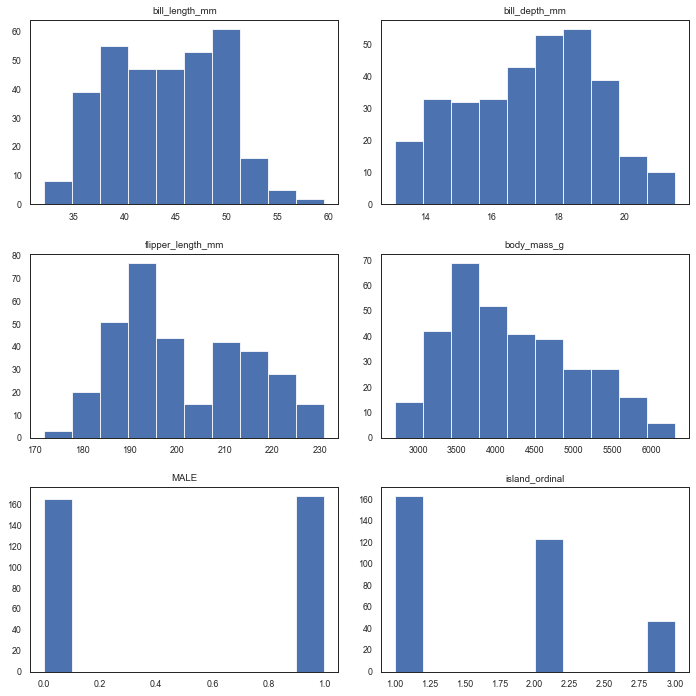

In [39]:
# Explore the TRAINING data

#Create histograms for each feature
n_bins = 10
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0,0].hist(df.iloc[:,1].values, bins = n_bins)
axs[0,0].set_title('bill_length_mm')
axs[0,1].hist(df.iloc[:,2].values, bins = n_bins)
axs[0,1].set_title('bill_depth_mm')
axs[1,0].hist(df.iloc[:,3].values, bins = n_bins)
axs[1,0].set_title('flipper_length_mm')
axs[1,1].hist(df.iloc[:,4].values, bins = n_bins)
axs[1,1].set_title('body_mass_g')
axs[2,0].hist(df.iloc[:,5].values, bins = n_bins)
axs[2,0].set_title('MALE')
axs[2,1].hist(df.iloc[:,6].values, bins = n_bins)
axs[2,1].set_title('island_ordinal')

# add some spacing between subplots
fig.tight_layout(pad=2.0)

          0         1         2         3         4         5
0  1.000000 -0.182466  0.605576  0.544667  0.293269 -0.319381
1 -0.182466  1.000000 -0.583195 -0.512588  0.433142  0.607322
2  0.605576 -0.583195  1.000000  0.871423  0.176247 -0.564282
3  0.544667 -0.512588  0.871423  1.000000  0.336594 -0.585234
4  0.293269  0.433142  0.176247  0.336594  1.000000  0.072174
5 -0.319381  0.607322 -0.564282 -0.585234  0.072174  1.000000


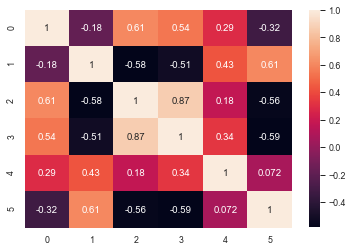

In [40]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
train = pd.DataFrame(x_train)
corr_matrix = train.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Conclusion:
# we notice that flipper_length_mm is highly 
# correnalted with body_mass_g

In [41]:
# Feature selection
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

# Split the data set before classification
# Train set: 70% of data to train the model
# Test set: 15% of data to test the model
# Validation set: 15% of data used to evaluate 
# the performance of each classifier and fine-tune 
# the model parameters
# Now we have small data set, therefore test set = validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [44]:
# Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test) 
accuracy_nb = round(metrics.accuracy_score(y_test, Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test, Y_pred)
precision = metrics.precision_score(y_test, Y_pred, average='micro')
recall = metrics.recall_score(y_test, Y_pred, average='micro')
f1 = metrics.f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[46  2  0]
 [ 3 13  0]
 [ 0  0 36]]
accuracy_Naive Bayes: 0.950
precision_Naive Bayes: 0.950
recall_Naive Bayes: 0.950
f1-score_Naive Bayes : 0.950


Text(0, 0.5, 'Mean Error')

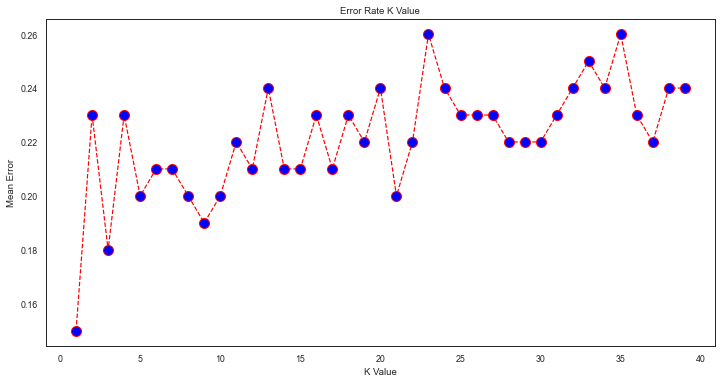

In [45]:
# K-NN (K-Nearest Neighbor)

# Determine optimal value for K
# Comparing error rate with K-value:
# calculate the mean of error for 
# all the predicted values where K ranges from 1 and 40

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
# Plot the error values against K values
# to find the best value for K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#Choose a K-value where mean error is closest to zero

<Figure size 432x288 with 0 Axes>

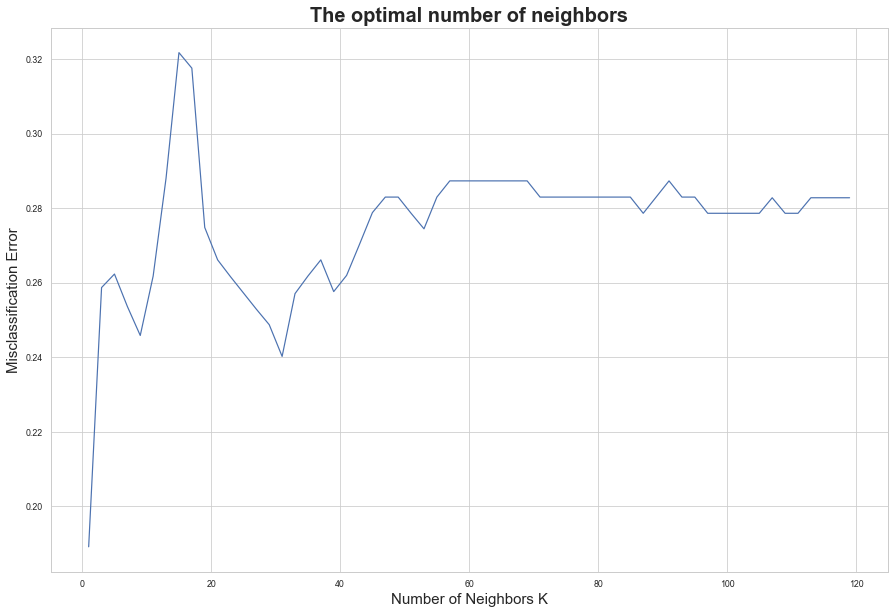

The optimal number of neighbors is 1.


In [52]:
# Using cross validation for parameter tuning

# creating list of K for KNN
k_list = list(range(1,120,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

# finding best K
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test) 
accuracy_knn=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[44  3  1]
 [ 5 10  1]
 [ 0  5 31]]
accuracy_KNN : 0.850
precision_KNN : 0.850
recall_KNN: 0.850
f1-score_KNN : 0.850


In [83]:
# Support Vector Machine

# dualbool, default=True
# Select the algorithm to either solve the dual or primal optimization problem. 
# Prefer dual=False when n_samples > n_features.
linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
accuracy_svc=round(metrics.accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

cm = metrics.confusion_matrix(y_test, Y_pred)
accuracy = metrics.accuracy_score(y_test,Y_pred)
precision = metrics.precision_score(y_test, Y_pred,average='micro')
recall = metrics.recall_score(y_test, Y_pred,average='micro')
f1 = metrics.f1_score(y_test,Y_pred,average='micro')

print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]
accuracy_SVC: 0.980
precision_SVC: 0.980
recall_SVC: 0.980
f1-score_SVC : 0.980


In [84]:
# Comparing classification methods
results = pd.DataFrame({
    'Model': ['KNN', 
              'Naive Bayes',  
              'Support Vector Machine'],
    'Score': [acc_knn,
              acc_gaussian,  
              acc_linear_svc],
    "Accuracy_score":[accuracy_knn,
                      accuracy_nb,
                      accuracy_svc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,Model,Score,Accuracy_score
0,Support Vector Machine,100.00,98.0
1,Naive Bayes,97.42,95.0
2,KNN,100.00,85.0
